# Домашняя работа №2

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import approx_fprime

### Задание 1

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$

Решение:

$f'(x) = (sin^2(2x+1))' = 2sin(2x+1)sin'(2x+1)(2x+1)' = 4cos(2x+1)sin(2x+1)$


$f''(x) = 4(cos(2x+1)sin(2x+1))' = 4(cos(2x+1))'sin(2x+1)+4cos(2x+1)(sin(2x+1))' = 4(-2sin(2x+1))sin(2x+1)+cos(2x+1)2cos(2·x+1)
=8(cos^2(2x+1)-sin^2(2x+1))$

### Задание 2: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

Решение:

$df(x,y)/dx = 4xy^3 - 1/x^2 + y^2$

$df(1,2)/dx = 4*8 - 1 + 4 = 35$

$df(x,y)/dy = 2x^2*3y^2 + x*2y = 6x^2y^2 + 2xy$

$df(1,2)/dy = 24 + 4 = 28$

РЕЗУЛЬТАТ: 35, 28

In [28]:
def func(x):
    return 2*x[0]**2*x[1]**3 + 1/x[0] + x[0]*x[1]**2 + 7
x = np.array([1, 2])

eps = np.sqrt(np.finfo(float).eps)
print('РЕЗУЛЬТАТ: ', approx_fprime(x, func, [eps, eps]))

РЕЗУЛЬТАТ:  [35.00000024 28.00000024]


### Задание 3

Найти точки минимума в следующих данных (колонка height):

In [29]:
data = pd.read_csv('video.csv')
data.head()

,sec,x1,y1,x2,y2,height
0,0,875,1411,1008,1835,414
1,1,883,1377,1057,1873,417
2,2,862,1397,1066,1872,417
3,3,878,1394,1046,1875,417
4,4,910,1378,1070,1866,417


Text(0, 0.5, 'изменение высоты по времени')

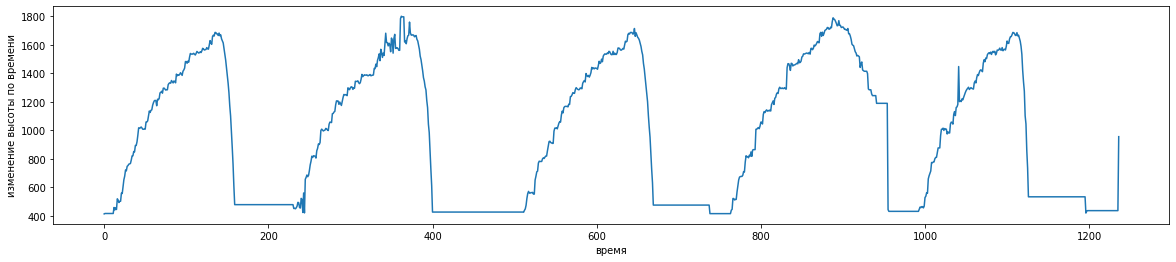

In [30]:
plt.figure(figsize=(20,4))
plt.plot(data.height)
plt.xlabel('время')
plt.ylabel('изменение высоты по времени')

In [31]:
list_ids = data.sec.unique()
list_derivatives = []
for i in range(len(list_ids)-1):
    sec_id_next = list_ids[i+1]
    sec_id = list_ids[i]
    height = list(data.loc[data.sec==sec_id, 'height'])[0]
    next_height = list(data.loc[data.sec==sec_id_next, 'height'])[0]
    list_derivatives.append((next_height - height)/(sec_id_next - sec_id))
list_derivatives.append(list_derivatives[-1])
data['first_derivative'] = list_derivatives

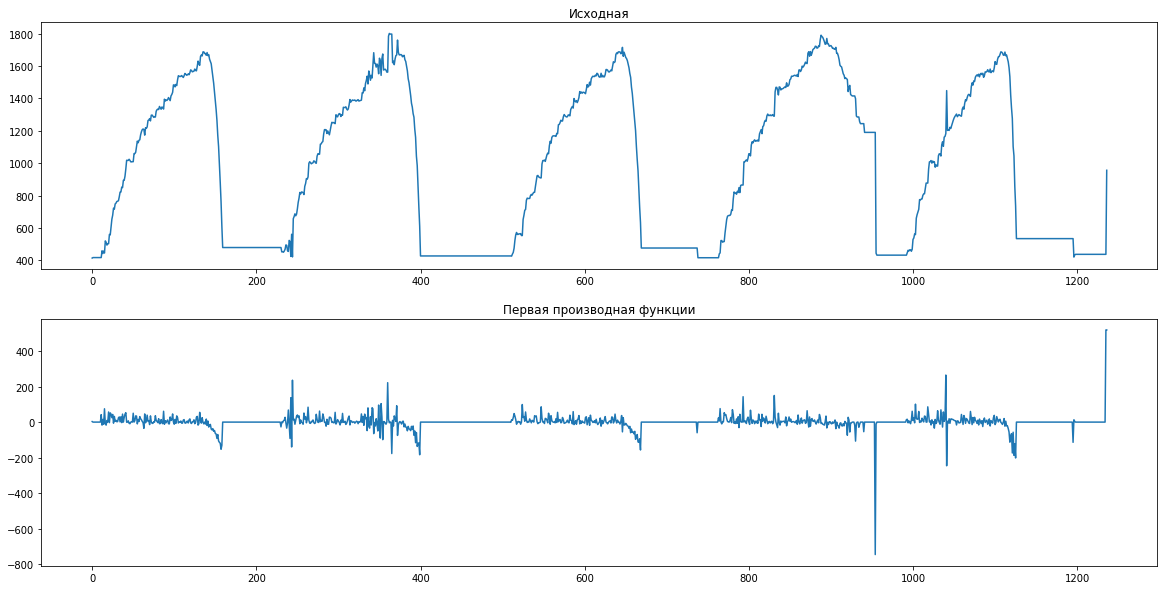

In [32]:
fig, axs = plt.subplots(2,figsize=(20,10))
axs[0].set_title('Исходная')
axs[0].plot([i for i in range(0, len(data))], data.height)
axs[1].set_title('Первая производная функции')
axs[1].plot([i for i in range(0, len(data['first_derivative']))], data['first_derivative'])

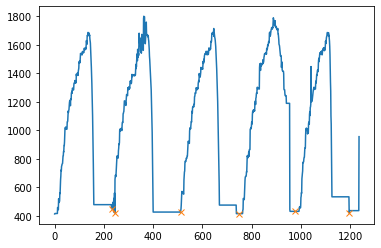

In [33]:
peaks, _ = find_peaks(-1*data.height, prominence=1, width=20)
plt.plot(data.height)
plt.plot(peaks, data.height[peaks], "x")
plt.show()

In [34]:
print('ТОЧКИ МИНИМУМА: ', peaks)

ТОЧКИ МИНИМУМА:  [ 233  244  511  750  974 1196]
